In [1]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [11]:
#Etapa 1, eda

data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

# nuestro data set consta de 6 variables , sin elememtos faltantes ni nulos.
#cuatro variables cuantitatiuvas year, Trimestrre , Price/month, price/meter
#dos cualitativas , dicotomicas y politomicas 

#del dataset en genral encontramos que se encuentra dividido por la variable cualitativa dicotomica : Average_rent. 
# Average_rent : average rent (euro/month) y average rent per surface (euro/m2) , ambos con 2311 filas o registros
#modificamos el dataset , y organizamos enn una nueva columna precio/m^2

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2311 non-null   int64  
 1   Trimester           2311 non-null   int64  
 2   District            2311 non-null   object 
 3   Neighbourhood       2311 non-null   object 
 4   Price (euro/month)  2311 non-null   float64
 5   Price (euro/m2)     2311 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 108.5+ KB


In [17]:
data.isnull().sum()

#gracias a Dios no hay nuloso o faltantes

Year                  0
Trimester             0
District              0
Neighbourhood         0
Price (euro/month)    0
Price (euro/m2)       0
dtype: int64

In [16]:

data.head()


,Year,Trimester,District,Neighbourhood,Price (euro/month),Price (euro/m2)
0,2014,1,Ciutat Vella,el Raval,589.55,10.76
1,2014,1,Ciutat Vella,Gothic Quarter,712.79,10.58
2,2014,1,Ciutat Vella,la Barceloneta,540.71,14.40
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01
4,2014,1,Eixample,Fort Pienc,736.09,10.42


In [19]:
price_month_mean = data.groupby("Year")["Price (euro/month)"].mean()
price_month_mean 

Year
2014    661.639048
2015    695.240399
2016    750.959891
2017    829.380403
2018    874.052259
2019    923.321561
2020    915.921190
2021    871.593704
2022    922.546667
Name: Price (euro/month), dtype: float64

In [20]:
price_meter_mean = data.groupby("Year")["Price (euro/m2)"].mean()
price_meter_mean

Year
2014     9.726777
2015    10.453043
2016    11.494239
2017    12.638059
2018    12.819444
2019    13.374349
2020    13.321190
2021    12.720741
2022    13.354815
Name: Price (euro/m2), dtype: float64

In [34]:
price_district_mean = data.groupby("District")["Price (euro/month)"].agg(["mean","max","min"])
price_district_mean.sort_values("mean")



,mean,max,min
District,,,
Nou Barris,597.405742,855.5,145.45
Sant Andreu,669.368551,898.5,142.34
Horta-Guinardo,711.139677,1044.0,368.00
Sants-Montjuic,745.296831,1407.9,350.50
Gracia,824.909647,1060.5,537.15
Ciutat Vella,834.704485,1181.6,540.71
Sant Marti,864.329647,1498.6,423.45
Eixample,963.165245,1349.6,663.23
Les Corts,1196.391471,2034.0,679.54


In [35]:
price_district_meter = data.groupby("District")["Price (euro/m2)"].agg(["mean","max","min"])
price_district_meter.sort_values("mean")

,mean,max,min
District,,,
Nou Barris,9.983249,13.10,3.54
Sant Andreu,10.495654,13.20,3.18
Horta-Guinardo,11.315572,15.20,7.62
Sants-Montjuic,11.951235,15.30,3.90
Sant Marti,12.663088,20.90,6.84
Gracia,12.830824,15.60,8.85
Eixample,12.892059,15.20,9.64
Les Corts,13.838137,17.66,10.02
Ciutat Vella,14.363456,21.30,9.84


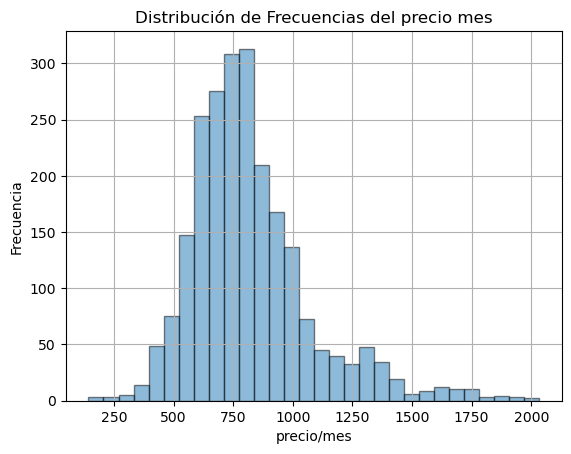

In [42]:
plt.hist(data["Price (euro/month)"],  bins=30, alpha=0.5, edgecolor='black')

plt.title('Distribución de Frecuencias del precio mes')
plt.xlabel('precio/mes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



# la distribucion de los precios se corresponde a una distribucion normal.

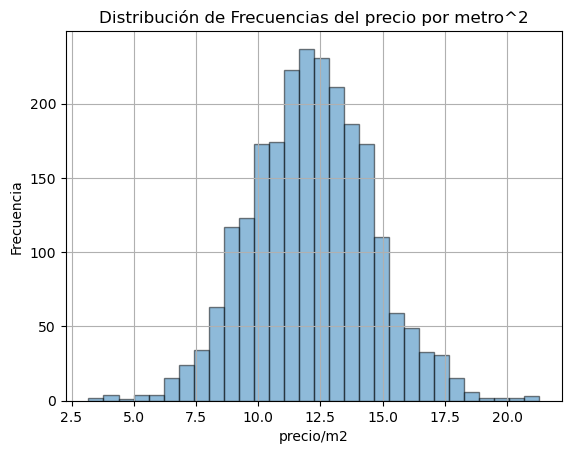

In [43]:
plt.hist(data["Price (euro/m2)"],  bins=30, alpha=0.5, edgecolor='black')

plt.title('Distribución de Frecuencias del precio por metro^2')
plt.xlabel('precio/m2')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

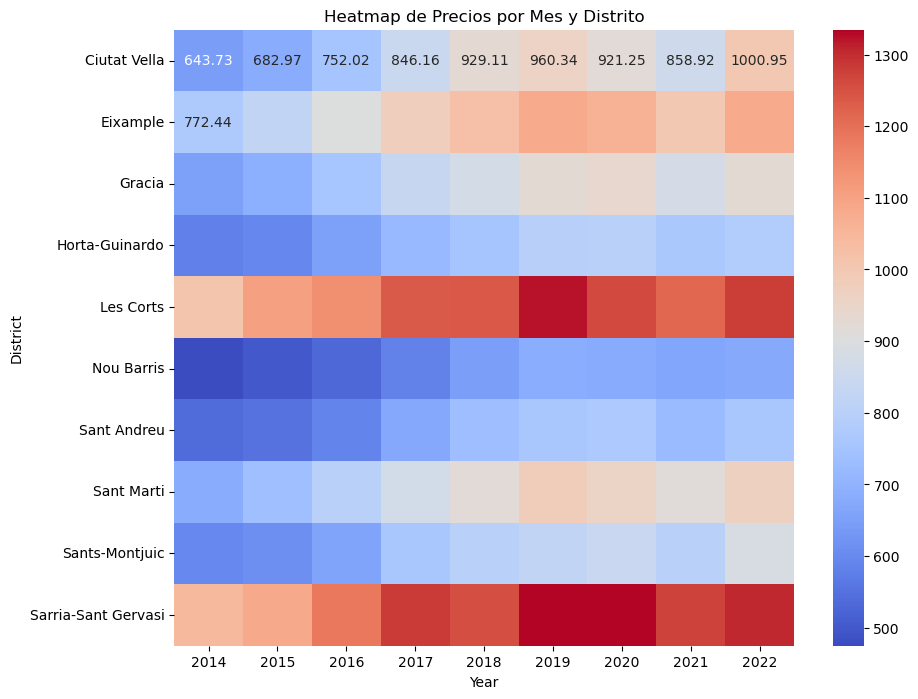

In [61]:

pivot_table = data.pivot_table(values='Price (euro/month)', index='District', columns='Year')

# Generar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Precios por Mes y Distrito')
plt.show()

In [72]:
data

,Year,Trimester,District,Neighbourhood,Price (euro/month),Price (euro/m2)
0,2014,1,Ciutat Vella,el Raval,589.55,10.76
1,2014,1,Ciutat Vella,Gothic Quarter,712.79,10.58
2,2014,1,Ciutat Vella,la Barceloneta,540.71,14.40
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01
4,2014,1,Eixample,Fort Pienc,736.09,10.42
...,...,...,...,...,...,...
2306,2022,2,Sant Marti,Diagonal Mar i el Front Maritim del Poblenou,1238.70,17.50
2307,2022,2,Sant Marti,el Besos i el Maresme,779.20,12.20
2308,2022,2,Sant Marti,Provencals del Poblenou,1032.90,14.60
2309,2022,2,Sant Marti,Sant Marti de Provencals,843.00,11.90


In [74]:
data[data["Trimester"]==2]

,Year,Trimester,District,Neighbourhood,Price (euro/month),Price (euro/m2)
68,2014,2,Ciutat Vella,el Raval,550.63,10.52
69,2014,2,Ciutat Vella,Gothic Quarter,728.79,10.18
70,2014,2,Ciutat Vella,la Barceloneta,541.93,14.53
71,2014,2,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",676.98,11.23
72,2014,2,Eixample,Fort Pienc,706.16,10.06
...,...,...,...,...,...,...
2306,2022,2,Sant Marti,Diagonal Mar i el Front Maritim del Poblenou,1238.70,17.50
2307,2022,2,Sant Marti,el Besos i el Maresme,779.20,12.20
2308,2022,2,Sant Marti,Provencals del Poblenou,1032.90,14.60
2309,2022,2,Sant Marti,Sant Marti de Provencals,843.00,11.90


In [77]:
data2= data.groupby("Trimester")["Year"]
list(data2)

[(1,
  0       2014
  1       2014
  2       2014
  3       2014
  4       2014
          ... 
  2238    2022
  2239    2022
  2240    2022
  2241    2022
  2242    2022
  Name: Year, Length: 611, dtype: int64),
 (2,
  68      2014
  69      2014
  70      2014
  71      2014
  72      2014
          ... 
  2306    2022
  2307    2022
  2308    2022
  2309    2022
  2310    2022
  Name: Year, Length: 615, dtype: int64),
 (3,
  138     2014
  139     2014
  140     2014
  141     2014
  142     2014
          ... 
  2103    2021
  2104    2021
  2105    2021
  2106    2021
  2107    2021
  Name: Year, Length: 541, dtype: int64),
 (4,
  206     2014
  207     2014
  208     2014
  209     2014
  210     2014
          ... 
  2171    2021
  2172    2021
  2173    2021
  2174    2021
  2175    2021
  Name: Year, Length: 544, dtype: int64)]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


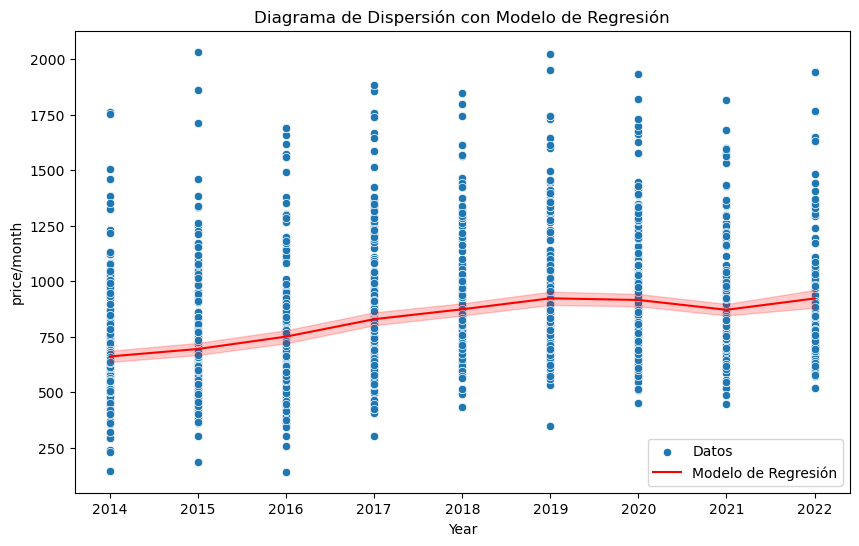

In [83]:

# Gráfico del modelo de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price (euro/month)', data=data, label='Datos')
sns.lineplot(x='Year', y='Price (euro/month)', data=data, color='red', label='Modelo de Regresión')
plt.title('Diagrama de Dispersión con Modelo de Regresión')
plt.xlabel('Year')
plt.ylabel('price/month')
plt.legend()
plt.show()

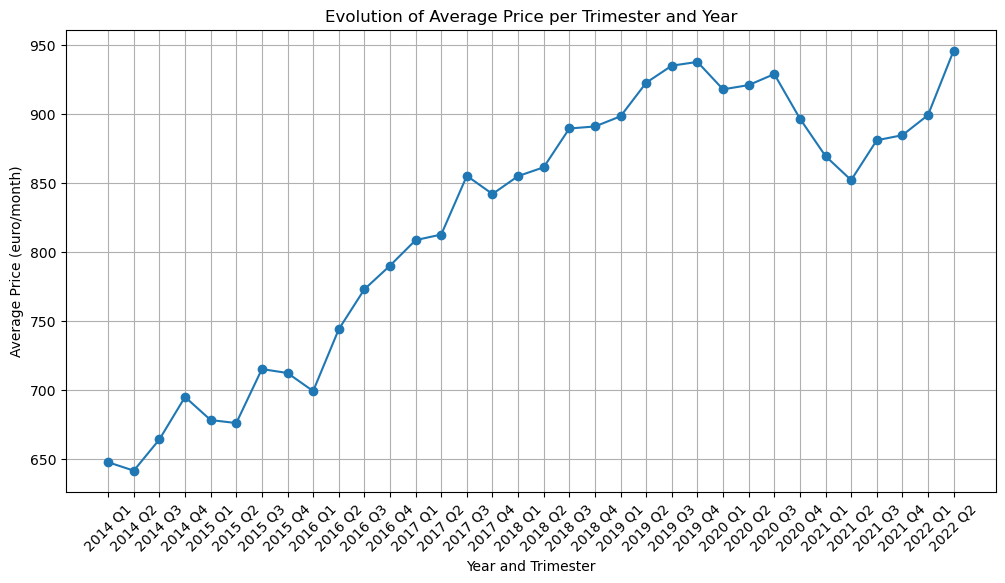

In [80]:
grouped = data.groupby(['Year', 'Trimester'])['Price (euro/month)'].mean().reset_index()

# Crear una columna para combinar Year y Trimester
grouped['Year_Trimester'] = grouped['Year'].astype(str) + ' Q' + grouped['Trimester'].astype(str)

# Visualizar la evolución usando un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(grouped['Year_Trimester'], grouped['Price (euro/month)'], marker='o')
plt.xlabel('Year and Trimester')
plt.ylabel('Average Price (euro/month)')
plt.title('Evolution of Average Price per Trimester and Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()